In [16]:
import numpy as np
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt


In [17]:
data = pd.read_csv('AprioriDataSet.csv')
data.head()

,orio,chips,bread,butter,milk,apple
0,orio,chips,bread,butter,milk,apple
1,orio,NaN,bread,butter,milk,NaN
2,NaN,NaN,bread,butter,milk,NaN
3,NaN,chips,NaN,NaN,NaN,apple
4,orio,chips,bread,butter,milk,apple


In [18]:
data = data.fillna(0)
data

,orio,chips,bread,butter,milk,apple
0,orio,chips,bread,butter,milk,apple
1,orio,0,bread,butter,milk,0
2,0,0,bread,butter,milk,0
3,0,chips,0,0,0,apple
4,orio,chips,bread,butter,milk,apple
...,...,...,...,...,...,...
112,orio,NaN,NaN,butter,milk,apple
113,orio,chips,bread,butter,milk,0
114,orio,NaN,bread,NaN,milk,apple
115,orio,NaN,bread,butter,milk,apple


In [19]:
for column in data.columns:
    data[column] = (data[column] != 0).astype(int)
print("Cleaned Dataset:")
print(data)

Cleaned Dataset:
     orio  chips  bread  butter  milk  apple
0       1      1      1       1     1      1
1       1      0      1       1     1      0
2       0      0      1       1     1      0
3       0      1      0       0     0      1
4       1      1      1       1     1      1
..    ...    ...    ...     ...   ...    ...
112     1      1      1       1     1      1
113     1      1      1       1     1      0
114     1      1      1       1     1      1
115     1      1      1       1     1      1
116     1      1      1       1     1      1

[117 rows x 6 columns]


In [20]:
frequent_itemsets = apriori(data, min_support=0.2, use_colnames=True)

C:\Users\91953\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [21]:
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
     support                                   itemsets
0   0.974359                                     (orio)
1   0.940171                                    (chips)
2   0.965812                                    (bread)
3   0.957265                                   (butter)
4   0.965812                                     (milk)
..       ...                                        ...
58  0.581197          (apple, bread, orio, milk, chips)
59  0.581197         (apple, orio, butter, milk, chips)
60  0.589744         (apple, bread, orio, butter, milk)
61  0.581197        (apple, bread, butter, milk, chips)
62  0.581197  (apple, bread, orio, butter, milk, chips)

[63 rows x 2 columns]


In [22]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

In [23]:
print("\nAssociation Rules:")
print(rules)


Association Rules:
         antecedents                         consequents  antecedent support  \
0             (orio)                             (chips)            0.974359   
1            (chips)                              (orio)            0.940171   
2            (bread)                              (orio)            0.965812   
3             (orio)                             (bread)            0.974359   
4             (orio)                            (butter)            0.974359   
..               ...                                 ...                 ...   
386    (apple, orio)        (bread, butter, chips, milk)            0.623932   
387  (apple, butter)          (bread, orio, chips, milk)            0.615385   
388    (apple, milk)        (bread, orio, butter, chips)            0.606838   
389   (apple, chips)         (bread, orio, butter, milk)            0.606838   
390          (apple)  (bread, orio, butter, milk, chips)            0.641026   

     consequent sup

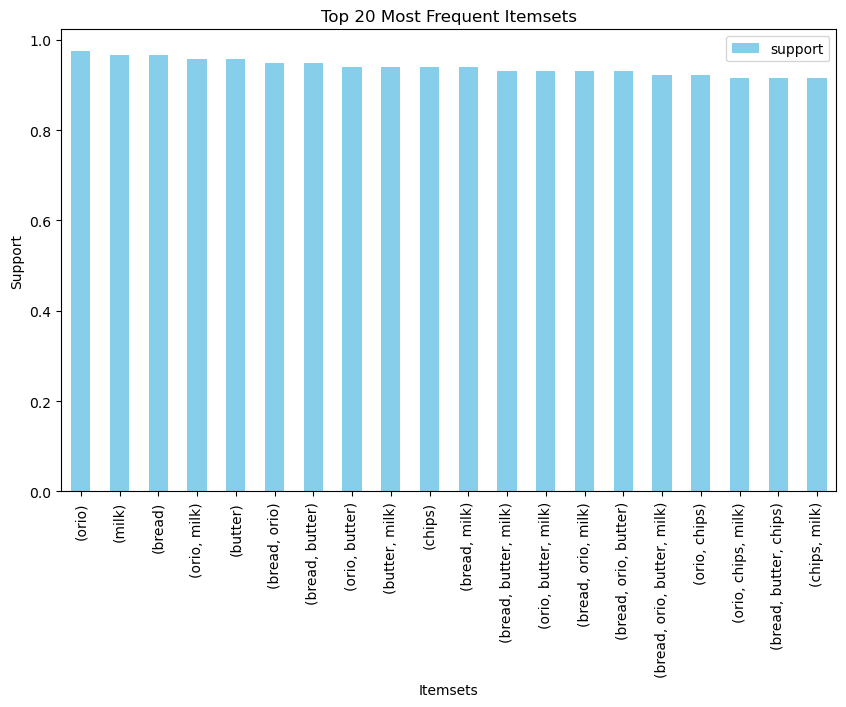

In [24]:
top_20_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(20)
plt.rcParams['figure.figsize'] = (10, 6)
color = plt.cm.inferno(np.linspace(0, 1, 20))
top_20_itemsets.plot.bar(x='itemsets', y='support', color='skyblue')
plt.title('Top 20 Most Frequent Itemsets')
plt.ylabel('Support')
plt.xlabel('Itemsets')
plt.show()